In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [256]:
data = pd.read_csv("/home/mike/Downloads/archive(14)/Corona_NLP_train.csv", engine='python')

In [9]:
data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [12]:
data.Sentiment = data.Sentiment.astype('category')

In [16]:
loc_values = data.Location.value_counts()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

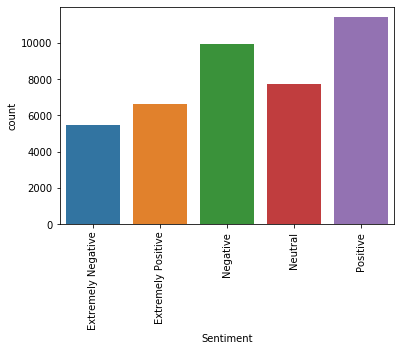

In [19]:
sns.countplot(data.Sentiment)
plt.xticks(rotation='vertical')

In [25]:
from wordcloud import WordCloud, STOPWORDS

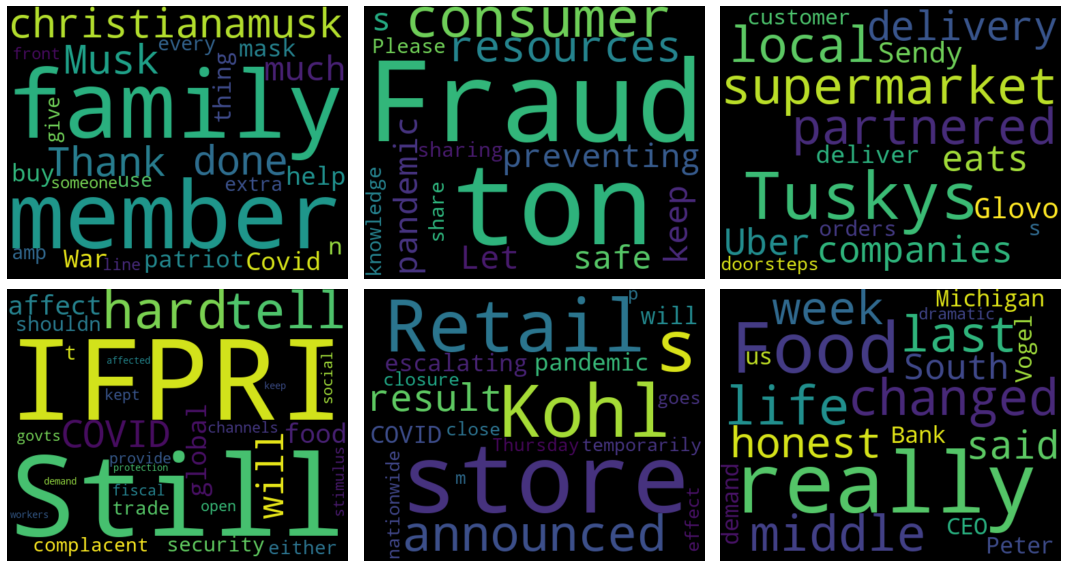

In [27]:
a = 2  # number of rows
b = 3  # number of columns
c = 1  

fig = plt.figure(figsize=(15,8))

for i in range(6):
    plt.subplot(a, b, c)
    text = data.OriginalTweet[np.random.randint(1,len(data))]
    wordcloud = WordCloud(height=400, width=500).generate(text)

    # Display the generated image:
#     plt.title(data[text])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    c = c + 1

plt.tight_layout()
plt.show()

In [28]:
data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   UserName       41157 non-null  int64   
 1   ScreenName     41157 non-null  int64   
 2   Location       32567 non-null  object  
 3   TweetAt        41157 non-null  object  
 4   OriginalTweet  41157 non-null  object  
 5   Sentiment      41157 non-null  category
dtypes: category(1), int64(2), object(3)
memory usage: 1.6+ MB


In [30]:
data.TweetAt = pd.to_datetime(data.TweetAt)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   UserName       41157 non-null  int64         
 1   ScreenName     41157 non-null  int64         
 2   Location       32567 non-null  object        
 3   TweetAt        41157 non-null  datetime64[ns]
 4   OriginalTweet  41157 non-null  object        
 5   Sentiment      41157 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(2), object(2)
memory usage: 1.6+ MB


In [97]:
data.index

RangeIndex(start=0, stop=41157, step=1)

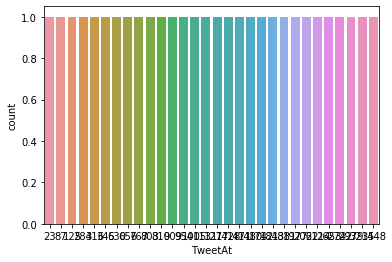

In [100]:
sns.countplot(data['TweetAt'].value_counts())

In [101]:
data.head()

UserName  ScreenName   Location    TweetAt  \
0      3799       48751     London 2020-03-16   
1      3800       48752         UK 2020-03-16   
2      3801       48753  Vagabonds 2020-03-16   
3      3802       48754        NaN 2020-03-16   
4      3803       48755        NaN 2020-03-16   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [104]:

# Use DataFrame.group() Function
result = data.groupby('TweetAt')['Sentiment'].aggregate('count')
result

TweetAt
2020-01-04     630
2020-02-04     954
2020-03-04     810
2020-03-16     656
2020-03-17    1977
2020-03-18    2742
2020-03-19    3215
2020-03-20    3448
2020-03-21    2653
2020-03-22    2114
2020-03-23    2062
2020-03-24    1480
2020-03-25    2979
2020-03-26    1277
2020-03-27     345
2020-03-28      23
2020-03-29     125
2020-03-30      87
2020-03-31     316
2020-04-04     767
2020-04-13    1428
2020-04-14     284
2020-05-04    1131
2020-06-04    1742
2020-07-04    1843
2020-08-04    1881
2020-09-04    1471
2020-10-04    1005
2020-11-04     909
2020-12-04     803
Name: Sentiment, dtype: int64

In [113]:
result = result.reset_index()

In [117]:
result

TweetAt  Sentiment
0  2020-01-04        630
1  2020-02-04        954
2  2020-03-04        810
3  2020-03-16        656
4  2020-03-17       1977
5  2020-03-18       2742
6  2020-03-19       3215
7  2020-03-20       3448
8  2020-03-21       2653
9  2020-03-22       2114
10 2020-03-23       2062
11 2020-03-24       1480
12 2020-03-25       2979
13 2020-03-26       1277
14 2020-03-27        345
15 2020-03-28         23
16 2020-03-29        125
17 2020-03-30         87
18 2020-03-31        316
19 2020-04-04        767
20 2020-04-13       1428
21 2020-04-14        284
22 2020-05-04       1131
23 2020-06-04       1742
24 2020-07-04       1843
25 2020-08-04       1881
26 2020-09-04       1471
27 2020-10-04       1005
28 2020-11-04        909
29 2020-12-04        803

In [127]:
from matplotlib.dates import DateFormatter

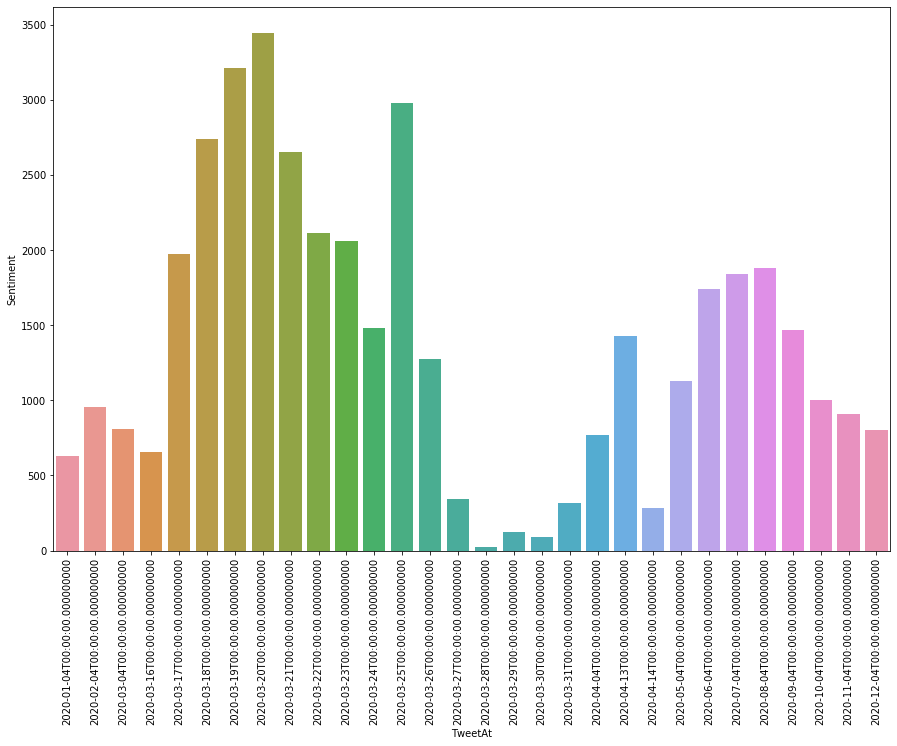

In [139]:
plt.figure(figsize=(15,10))

sns.barplot(x='TweetAt', y='Sentiment', data=result)

plt.xticks(rotation='vertical')

plt.show()

In [257]:
import re

In [258]:
def get_hashtags(text):
    text = re.findall(r'\B#\w*[a-zA-Z]+\w*', text)
    if len(text)==0:
        return np.nan
    else:
        return text

In [276]:
x = get_hashtags(data['OriginalTweet'][10000])

In [277]:
x

['#teachers', '#nurses', '#doctors', '#Covid_19', '#StaySafeStayHome']

In [266]:
hashtags = data['OriginalTweet'].apply(get_hashtags)

In [273]:
hashtags[1000]

['#COVID2019', '#Trump2020', '#CoronavirusOutbreak']

In [268]:
hashtags.isna().sum()

17461

In [269]:
hashtags.dropna(inplace=True)

In [270]:
type(hashtags)

pandas.core.series.Series

In [271]:
hashtags.reset_index(drop=True, inplace=True)

In [272]:
for i in hashtags:
    count = 0
    for j in hashtags[count]:
        print(j)
        count+=1

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19fr

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confine

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confine

#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confine

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confine

#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19fr

#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confine

#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19fr

#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confine

#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19fr

#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19fr

#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19fr

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confine

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19fr

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19fr

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19fr

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confine

#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19fr

#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementG

#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal


#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronaviru

#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVI

#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Confinementotal
#ConfinementGeneral
#COVID19france
#COVID_19
#COVID19
#coronavirus
#confinement
#Con

In [222]:
h_tags = []

for i in hashtags:
    count = 0
    for j in hashtags[count]:
        h_tags.append(j)

In [230]:
h_tags = pd.Series(h_tags)

In [232]:
h_tags.index

RangeIndex(start=0, stop=165872, step=1)

In [235]:
h_tags.value_counts()

#COVID_19              23696
#COVID19france         23696
#coronavirus           23696
#Confinementotal       23696
#confinement           23696
#ConfinementGeneral    23696
#COVID19               23696
dtype: int64

In [236]:
data['OriginalTweet'][1200]

"During the #quarenteen for #coronavirus, I've lowered all of my ebook prices to .99 cents (lowest I can do on amazon), so if you need some fantasy novels to keep you company, I've got you covered :) #StayHomeAndRead\r\r\nhttps://t.co/DsF4k2rOEa"

In [243]:
def remove_urls(text):
#replace URL of a text
    text = re.sub(r"http\S+", "", text)
    return text

In [244]:
a = remove_urls(data['OriginalTweet'][1200])

In [245]:
print(a)

In [247]:
data = data['OriginalTweet'].apply(remove_urls)

In [255]:
data[10]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines "